In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
import warnings
# Suppress warnings from openpyxl regarding unknown extensions
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

In [3]:
file_path = 'Segmentation supplement -UV7035-XLS-ENG.xlsx'

In [24]:
df = pd.read_excel(r"C:\Users\DELL\Downloads\Segmentation supplement -UV7035-XLS-ENG.xlsx", sheet_name=1)

In [26]:
df.info

<bound method DataFrame.info of      Obs  Customer  I tend to plan things very carefully.  \
0      2         0                                      1   
1      3         0                                      1   
2      4         0                                      2   
3      5         0                                      2   
4     10         0                                      2   
..   ...       ...                                    ...   
390  478         1                                      3   
391  479         1                                      2   
392  480         1                                      1   
393  481         1                                      1   
394  482         1                                      1   

     I sometimes have trouble controlling my spending.  \
0                                                    2   
1                                                    3   
2                                                    4   
3  

In [28]:
q16_columns = ['I tend to plan things very carefully.', 'I sometimes have trouble controlling my spending.', 'I think it is important to purchase products that are made locally.', 'I carefully consider the health benefits of what I eat.']

In [30]:
df_q16 = df[q16_columns].dropna().copy()

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_q16)

In [34]:
sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sum_of_squared_distances.append(km.inertia_)

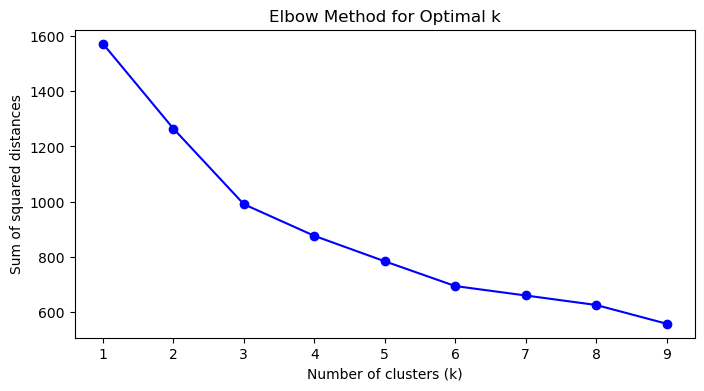

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(K, sum_of_squared_distances, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [38]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_q16['cluster'] = kmeans.fit_predict(X_scaled)

In [40]:
score = silhouette_score(X_scaled, df_q16['cluster'])
print(f"Silhouette Score for k = {optimal_k}: {score:.2f}")

Silhouette Score for k = 3: 0.24


In [42]:
df['cluster'] = df_q16['cluster']

In [44]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

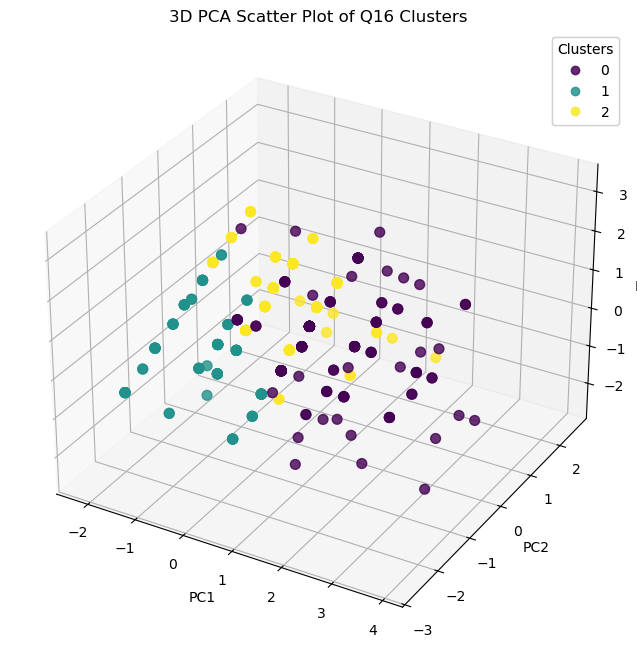

In [46]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=df_q16['cluster'], cmap='viridis', s=50, alpha=0.8)
ax.set_title('3D PCA Scatter Plot of Q16 Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

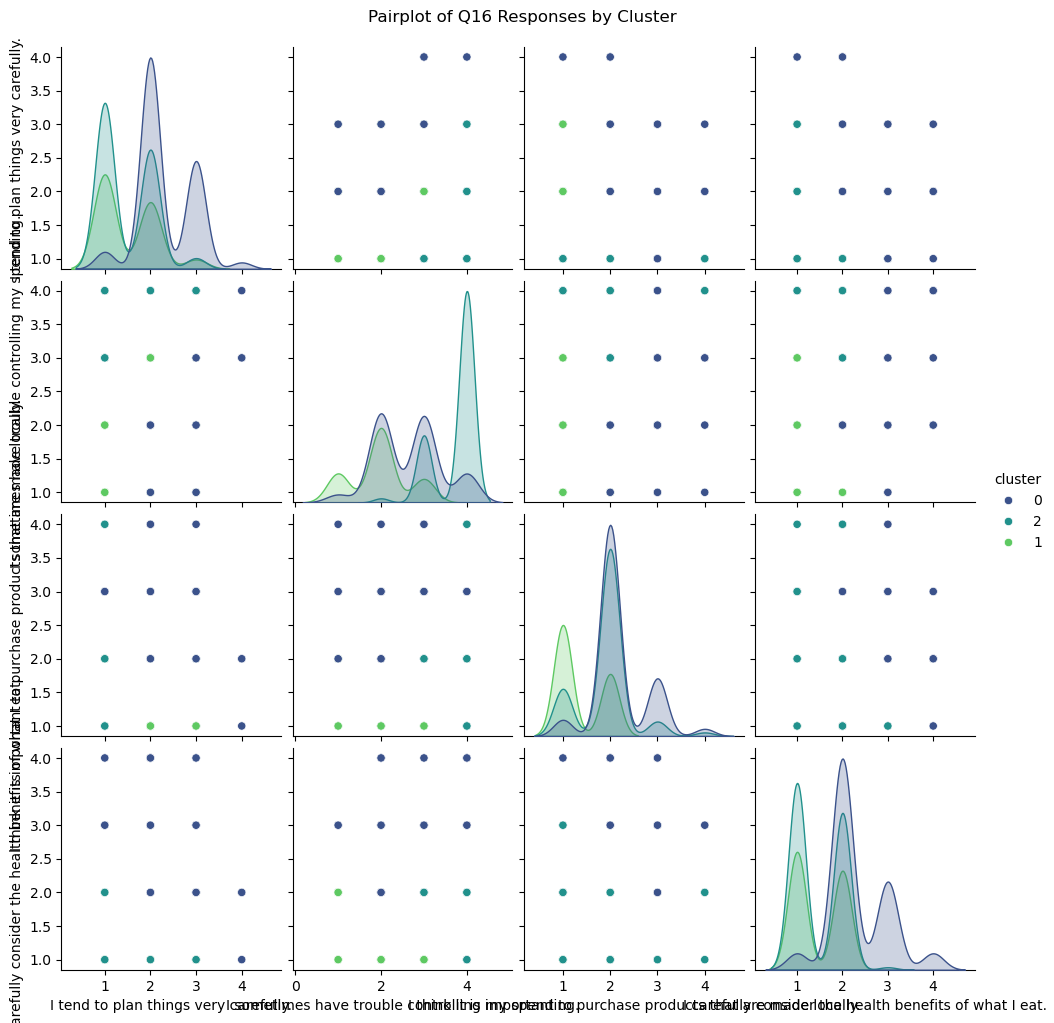

In [48]:
df_q16['cluster'] = df_q16['cluster'].astype(str)  # Convert to string for better labeling
sns.pairplot(df_q16, vars=q16_columns, hue='cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Q16 Responses by Cluster', y=1.02)
plt.show()

In [49]:
cluster_profiles = df_q16.groupby('cluster')[q16_columns].mean()
print("\nCluster Profiles (Average Q16 Scores):\n", cluster_profiles)


Cluster Profiles (Average Q16 Scores):
          I tend to plan things very carefully.  \
cluster                                          
0                                     2.302469   
1                                     1.500000   
2                                     1.474820   

         I sometimes have trouble controlling my spending.  \
cluster                                                      
0                                                 2.641975   
1                                                 1.956522   
2                                                 3.733813   

         I think it is important to purchase products that are made locally.  \
cluster                                                                        
0                                                 2.191358                     
1                                                 1.358696                     
2                                                 1.899281                   

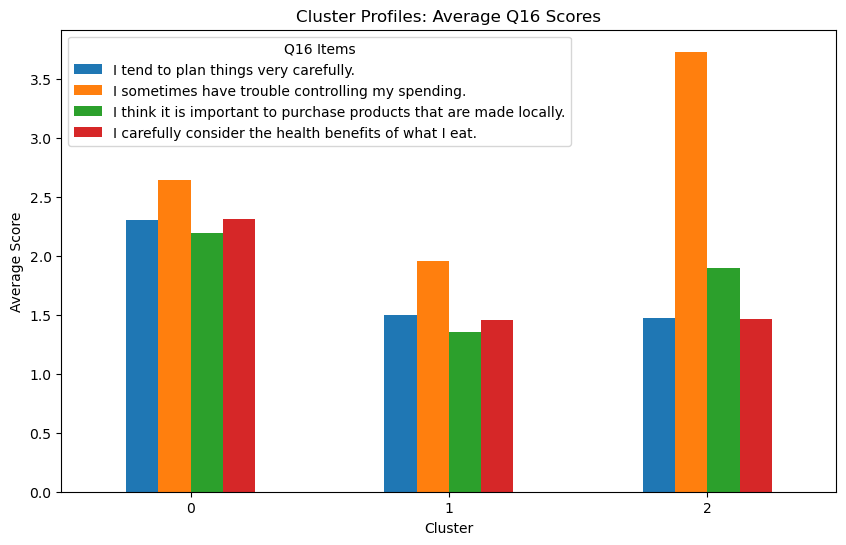

In [52]:
cluster_profiles.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles: Average Q16 Scores')
plt.xlabel('Cluster')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Q16 Items')
plt.show()

In [54]:
for cluster in sorted(df_q16['cluster'].unique()):
    print(f"\nCluster {cluster} Profile:")
    print(cluster_profiles.loc[cluster])


Cluster 0 Profile:
I tend to plan things very carefully.                                  2.302469
I sometimes have trouble controlling my spending.                      2.641975
I think it is important to purchase products that are made locally.    2.191358
I carefully consider the health benefits of what I eat.                2.314815
Name: 0, dtype: float64

Cluster 1 Profile:
I tend to plan things very carefully.                                  1.500000
I sometimes have trouble controlling my spending.                      1.956522
I think it is important to purchase products that are made locally.    1.358696
I carefully consider the health benefits of what I eat.                1.456522
Name: 1, dtype: float64

Cluster 2 Profile:
I tend to plan things very carefully.                                  1.474820
I sometimes have trouble controlling my spending.                      3.733813
I think it is important to purchase products that are made locally.    1.899281
I carefully 